# Car Evaluation 
In this notebook, we will explore this dataset and accordingly select a machine learning model. Then we will fine tune it to achieve better accuracy and finally save our model.

## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
file = open('../../dataset/car.txt')
carDesc = file.read()
file.close()
print(carDesc)

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [3]:
df = pd.read_csv('../../dataset/car.csv')

In [4]:
df.shape

(1727, 7)

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [7]:
df.rename(columns = {'vhigh': 'buying', 'vhigh.1': 'maint', '2': 'doors', '2.1': 'persons',
                     'small': 'lugboot', 'low': 'safety', 'unacc': 'target'}, inplace=True)
df.head()

,buying,maint,doors,persons,lugboot,safety,target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.isnull().any()

buying     False
maint      False
doors      False
persons    False
lugboot    False
safety     False
target     False
dtype: bool

In [9]:
df.dtypes

buying     object
maint      object
doors      object
persons    object
lugboot    object
safety     object
target     object
dtype: object

<AxesSubplot:>

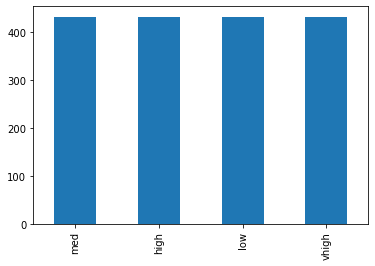

In [10]:
df['buying'].value_counts().plot(kind='bar')

<AxesSubplot:>

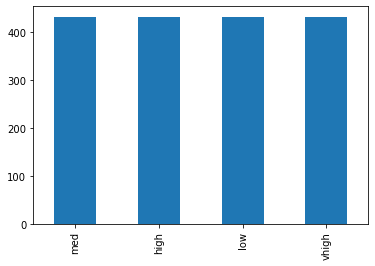

In [11]:
df['maint'].value_counts().plot(kind='bar')

<AxesSubplot:>

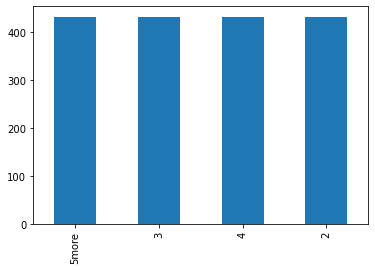

In [12]:
df['doors'].value_counts().plot(kind='bar')

<AxesSubplot:>

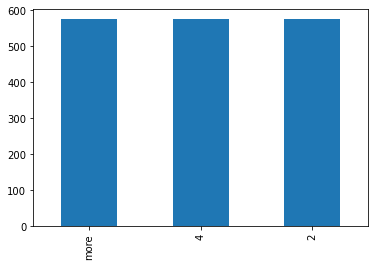

In [13]:
df['persons'].value_counts().plot(kind='bar')

<AxesSubplot:>

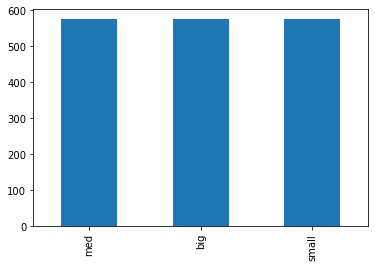

In [14]:
df['lugboot'].value_counts().plot(kind='bar')

<AxesSubplot:>

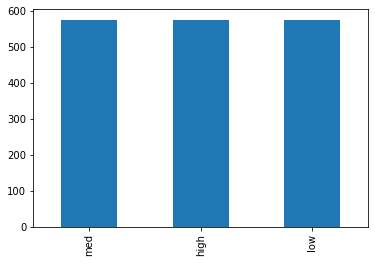

In [15]:
df['safety'].value_counts().plot(kind='bar')

<AxesSubplot:>

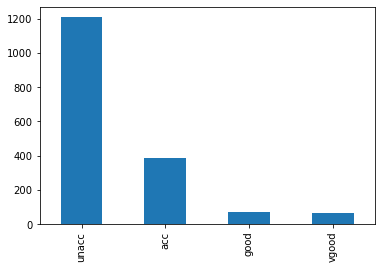

In [16]:
df['target'].value_counts().plot(kind='bar')

In [17]:
df['target'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: target, dtype: int64

## Encoding The Data 

In [18]:
# Let us encode the data because we have to vectorize it.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

def encode_data(df):
    col_names = ['buying', 'maint', 'lugboot', 'safety', 'target']
    for col in col_names:
        df[col] = encoder.fit_transform(df[col])
        
encode_data(df)
df.head()

,buying,maint,doors,persons,lugboot,safety,target
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2


In [19]:
df.tail()

,buying,maint,doors,persons,lugboot,safety,target
1722,1,1,5more,more,1,2,1
1723,1,1,5more,more,1,0,3
1724,1,1,5more,more,0,1,2
1725,1,1,5more,more,0,2,1
1726,1,1,5more,more,0,0,3


In [20]:
df.loc[df['doors'] == '5more', 'doors'] = 5
df.loc[df['persons'] == 'more', 'persons'] = 5
df.tail()

,buying,maint,doors,persons,lugboot,safety,target
1722,1,1,5,5,1,2,1
1723,1,1,5,5,1,0,3
1724,1,1,5,5,0,1,2
1725,1,1,5,5,0,2,1
1726,1,1,5,5,0,0,3


In [21]:
df.dtypes

buying      int32
maint       int32
doors      object
persons    object
lugboot     int32
safety      int32
target      int32
dtype: object

In [27]:
df.doors = df['doors'].astype('int32')

In [28]:
df.persons = df['persons'].astype('int32')

In [29]:
df.dtypes

buying     int32
maint      int32
doors      int32
persons    int32
lugboot    int32
safety     int32
target     int32
dtype: object

In [59]:
df[df['target']==0]

,buying,maint,doors,persons,lugboot,safety,target
226,3,2,2,4,2,0,0
229,3,2,2,4,1,0,0
231,3,2,2,4,0,2,0
232,3,2,2,4,0,0,0
238,3,2,2,5,1,0,0
...,...,...,...,...,...,...,...
1665,1,1,3,5,2,2,0
1683,1,1,4,4,2,2,0
1692,1,1,4,5,2,2,0
1710,1,1,5,4,2,2,0


In [30]:
df.target.value_counts()

2    1209
0     384
1      69
3      65
Name: target, dtype: int64

Now, we have our data ready for training. Considering we have 4 target classes (0, 1, 2, 3) => we have a classification problem
here. Therefore, we can use SVM (one vs all), RandomForest (ensemble method), and Logistic Regression (one vs all).
We have decided these 3 ML models. After selecting the best performing model, we will use 5 kfolds for cross validation and then finally save our model.

## Training The Models

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = df.iloc[:, 0:6].values #All rows and 5 columns.
y = df.iloc[:, 6].values #All rows and 6th column.

#Now we will divide out data into training and testing splits.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1) #Training 80% of our data and keeping 20% for our testing phase.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [71]:
def run_svc(x_train, y_train, x_test, y_test, C=1.0, kernel=None):
    svc = SVC(C=C, kernel=kernel)
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    print(f'Classification report:\n {classification_report(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [72]:
def run_logistic_regression(x_train, y_train, x_test, y_test, C=1.0, penalty='l2'):
    log_reg = LogisticRegression(C=C, penalty=penalty)
    log_reg.fit(x_train, y_train)
    y_pred = log_reg.predict(x_test)
    print(f'Classification report:\n {classification_report(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [73]:
def run_random_forest(x_train, y_train, x_test, y_test, n_estimators=100, criterion='gini', max_depth=10):
    rf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    print(f'Classification report:\n {classification_report(y_test, y_pred)}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

#### 1. Results of SVM

In [74]:
run_svc(x_train, y_train, x_test, y_test, C=1.2, kernel='linear')

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.15      0.23        73
           1       0.00      0.00      0.00        13
           2       0.73      0.99      0.84       239
           3       0.00      0.00      0.00        21

    accuracy                           0.72       346
   macro avg       0.31      0.29      0.27       346
weighted avg       0.61      0.72      0.63       346

Accuracy: 0.7167630057803468


c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
run_svc(x_train, y_train, x_test, y_test, C=1.8, kernel='rbf')

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68        73
           1       0.00      0.00      0.00        13
           2       0.92      0.95      0.93       239
           3       1.00      0.71      0.83        21

    accuracy                           0.85       346
   macro avg       0.64      0.60      0.61       346
weighted avg       0.83      0.85      0.84       346

Accuracy: 0.8526011560693642


c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
run_svc(x_train, y_train, x_test, y_test, C=3.4, kernel='rbf')

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82        73
           1       0.82      0.69      0.75        13
           2       0.97      0.95      0.96       239
           3       1.00      0.90      0.95        21

    accuracy                           0.92       346
   macro avg       0.89      0.85      0.87       346
weighted avg       0.92      0.92      0.92       346

Accuracy: 0.9219653179190751


In [77]:
run_svc(x_train, y_train, x_test, y_test, C=6.0, kernel='rbf')

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        73
           1       0.92      0.92      0.92        13
           2       0.97      0.97      0.97       239
           3       1.00      0.90      0.95        21

    accuracy                           0.95       346
   macro avg       0.94      0.92      0.93       346
weighted avg       0.95      0.95      0.95       346

Accuracy: 0.9479768786127167


We can achieve 100% accuracy but we will not overfit the data here. 

#### 2. Results of Logistic Regression

In [78]:
run_logistic_regression(x_train, y_train, x_test, y_test, C=1.0, penalty='l2')

Classification report:
               precision    recall  f1-score   support

           0       0.30      0.21      0.24        73
           1       0.00      0.00      0.00        13
           2       0.73      0.90      0.81       239
           3       0.50      0.05      0.09        21

    accuracy                           0.67       346
   macro avg       0.38      0.29      0.29       346
weighted avg       0.60      0.67      0.62       346

Accuracy: 0.6705202312138728


c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
run_logistic_regression(x_train, y_train, x_test, y_test, C=3.0, penalty='l2')

c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report:
               precision    recall  f1-score   support

           0       0.28      0.18      0.22        73
           1       0.00      0.00      0.00        13
           2       0.73      0.90      0.81       239
           3       0.40      0.10      0.15        21

    accuracy                           0.67       346
   macro avg       0.35      0.29      0.30       346
weighted avg       0.59      0.67      0.61       346

Accuracy: 0.6676300578034682


c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
run_logistic_regression(x_train, y_train, x_test, y_test, C=5.0, penalty='l2')

c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\amaan\python projects\streamlit data apps\car evaluation\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:
               precision    recall  f1-score   support

           0       0.28      0.18      0.22        73
           1       0.00      0.00      0.00        13
           2       0.73      0.90      0.81       239
           3       0.40      0.10      0.15        21

    accuracy                           0.67       346
   macro avg       0.35      0.29      0.30       346
weighted avg       0.59      0.67      0.61       346

Accuracy: 0.6676300578034682


It looks like LR is not performing good at all. Hence, we will not even consider this model now.

#### 3. Results of Random Forest

In [81]:
run_random_forest(x_train, y_train, x_test, y_test, n_estimators=100, criterion='gini', max_depth=10)

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88        73
           1       1.00      0.69      0.82        13
           2       0.98      0.97      0.97       239
           3       1.00      0.95      0.98        21

    accuracy                           0.95       346
   macro avg       0.95      0.89      0.91       346
weighted avg       0.95      0.95      0.95       346

Accuracy: 0.9479768786127167


In [82]:
run_random_forest(x_train, y_train, x_test, y_test, n_estimators=150, criterion='gini', max_depth=20)

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        73
           1       1.00      0.77      0.87        13
           2       0.97      0.97      0.97       239
           3       1.00      0.95      0.98        21

    accuracy                           0.95       346
   macro avg       0.96      0.90      0.93       346
weighted avg       0.95      0.95      0.95       346

Accuracy: 0.9508670520231214


In [83]:
run_random_forest(x_train, y_train, x_test, y_test, n_estimators=150, criterion='entropy', max_depth=20)

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        73
           1       1.00      0.92      0.96        13
           2       0.98      0.97      0.97       239
           3       1.00      0.90      0.95        21

    accuracy                           0.96       346
   macro avg       0.96      0.93      0.95       346
weighted avg       0.96      0.96      0.96       346

Accuracy: 0.9566473988439307


This model also performs well. 

As we noticed from the results, SVM can perform the best with very good metrics if we use more regularization (but this will be more expensive computationally). However, random forest gives the best performance overall. Hence, we will save random forest as our best model and then save it as a pickle file.

## Making Sample Predictions And Saving The Model

In [88]:
rf = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=20)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'Classification report:\n {classification_report(y_test, y_pred)}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        73
           1       1.00      0.85      0.92        13
           2       0.98      0.97      0.98       239
           3       1.00      0.90      0.95        21

    accuracy                           0.96       346
   macro avg       0.96      0.91      0.94       346
weighted avg       0.96      0.96      0.96       346

Accuracy: 0.9566473988439307


In [89]:
y_pred[0]

2

In [90]:
x_test[0]

array([1, 0, 2, 5, 1, 1])

In [91]:
y_test[0]

2

In [92]:
import pickle
filename = 'careval_finalized_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

With this, we have finalized and saved our model. Now we will use streamlit to make an app where we can deploy our model in real time and make predictions.